<a href="https://colab.research.google.com/github/rockfirehan/MaskDetection/blob/main/yolo3_FaceMaskDetection_(submit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!git clone https://github.com/AlexeyAB/darknet.git 

Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.69 MiB | 30.02 MiB/s, done.
Resolving deltas: 100% (10406/10406), done.


In [3]:
 %cd drive/MyDrive/darknet

/content/drive/MyDrive/darknet


In [4]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

print("Building. . . It might take 2-3 minutes")
#!make clean
!make &> build_log.txt

Building. . . It might take 2-3 minutes


In [ ]:
#!./darknet detector train cfg_mask.data yolo3-train.cfg darknet53.conv.74 -dont_show map 2> train_log.txt
!./darknet detector train cfg_mask.data yolo3-train.cfg backup/yolo3-train_last.weights -dont_show 2> train_log.txt

yolo3-train
net.optimized_memory = 0 
mini_batch = 2, batch = 64, time_steps = 1, train = 1 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 256 K-images (4 Kilo-batches_64) 
Learning Rate: 0.001, Momentum: 0.9, Decay: 0.0005
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
Resizing, random_coef = 1.40 

 608 x 608 
 try to allocate additional workspace_size = 164.41 MB 
 CUDA allocate done! 
Loaded: 0.000042 seconds

 4001: 0.640938, 0.640938 avg loss, 0.001000 rate, 25.619263 seconds, 256064 images, -1.000000 hours left
Loaded: 0.000051 seconds

 4002: 0.933760, 0.670220 avg loss, 0.001000 rate, 25.706694 seconds, 256128 images, 14.225844 hours left
Loaded: 0.000035 seconds

 4003: 0.673957, 0.670594 avg loss, 0.001000 rate, 25.994754 seconds, 256192 images, 14.226258 hours left
Loaded: 0.000053 seconds

 4004: 1.117828, 0.715317 avg loss, 0.001000 rate, 26.484874 seconds, 256256 images, 14.228194 hours left
Lo

In [5]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 320 K-images (5 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test-image1.jpg: Predicted in 105.527000 milli-seconds.
Mask: 100%


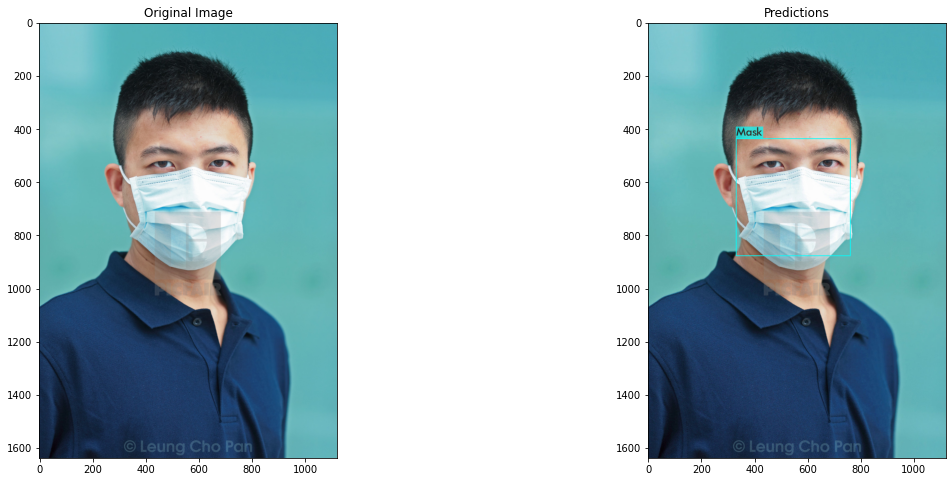

In [16]:
!./darknet detector test cfg_mask.data yolo3-test.cfg backup/yolo3-train_5000.weights test-image1.jpg -dont_show -thresh 0.6 2> /dev/null
display_output("test-image1.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 320 K-images (5 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test-image2.jpg: Predicted in 105.614000 milli-seconds.
Mask: 100%
Mask: 100%
Mask: 97%
No-mask: 100%
Mask: 99%


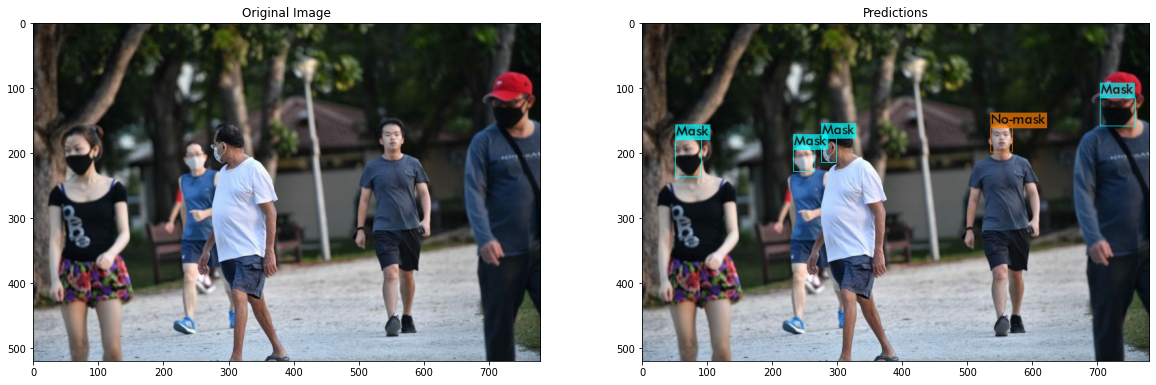

In [17]:
!./darknet detector test cfg_mask.data yolo3-test.cfg backup/yolo3-train_5000.weights test-image2.jpg -dont_show -thresh 0.6 2> /dev/null
display_output("test-image2.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 320 K-images (5 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test-image3.jpg: Predicted in 94.744000 milli-seconds.
Mask: 100%
Mask: 100%
Mask: 100%
No-mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 99%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 99%
Mask: 100%
Mask: 100%


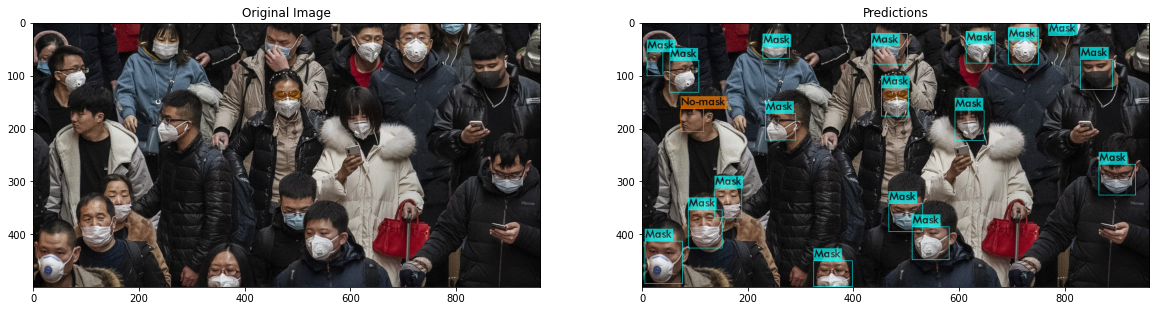

In [18]:
!./darknet detector test cfg_mask.data yolo3-test.cfg backup/yolo3-train_5000.weights test-image3.jpg -dont_show -thresh 0.6 2> /dev/null
display_output("test-image3.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
Create CUDA-stream - 0 
 Create cudnn-handle 0 

 seen 64, trained: 320 K-images (5 Kilo-batches_64) 
 Detection layer: 82 - type = 28 
 Detection layer: 94 - type = 28 
 Detection layer: 106 - type = 28 
test-image4.jpg: Predicted in 87.194000 milli-seconds.
No-mask: 99%
No-mask: 96%
Mask: 100%
Mask: 100%
No-mask: 80%
Mask: 100%
No-mask: 82%
Mask: 100%


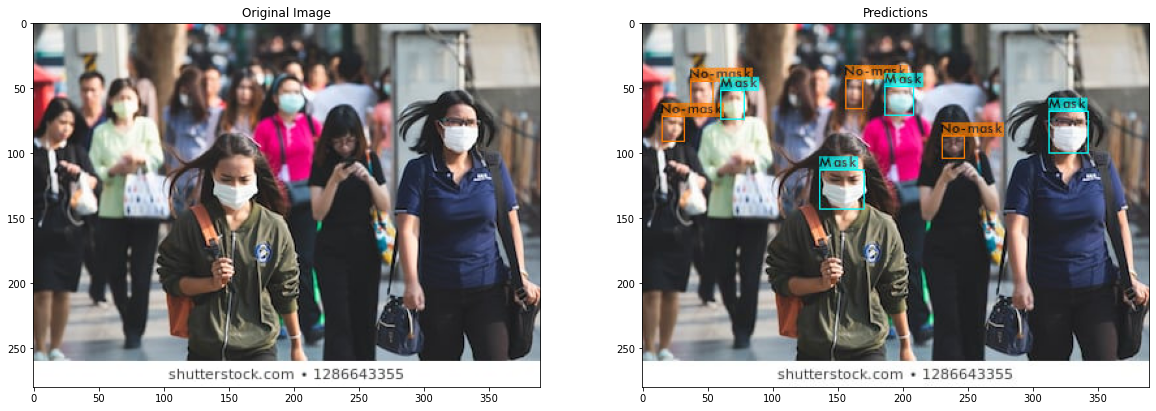

In [19]:
!./darknet detector test cfg_mask.data yolo3-test.cfg backup/yolo3-train_5000.weights test-image4.jpg -dont_show -thresh 0.6 2> /dev/null
display_output("test-image4.jpg")

In [20]:
!./darknet detector demo cfg_mask.data yolo3-train.cfg backup/yolo3-train_5000.weights test-video1.mp4 -thresh 0.6 -out_filename yolo3-video-1.avi -dont_show

流式输出内容被截断，只能显示最后 5000 行内容。
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 91% 

FPS:11.8 	 AVG_FPS:11.6

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 91% 

FPS:11.8 	 AVG_FPS:11.6

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 92% 

FPS:11.7 	 AVG_FPS:11.6

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 92% 

FPS:11.8 	 AVG_FPS:11.6

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 89% 

FPS:11.8 	 AVG_FPS:11.6

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 89% 

FPS:11.8 	 AVG_FPS:11.6

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 89% 

FPS:11.8 	 AVG_FPS:11.6

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 89% 

FPS:11.9 	 AVG_FPS:11.6

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 89% 

FPS:11.9 	 AVG_FPS:11.6

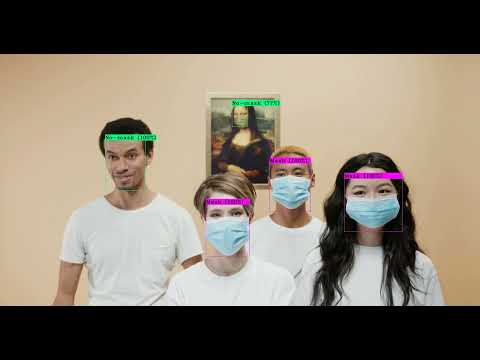

In [22]:
from IPython.display import YouTubeVideo, display
#https://youtu.be/5RfPhSeZoLs  video1
video = YouTubeVideo("5RfPhSeZoLs", width=640, height=360)
display(video)

In [21]:
!./darknet detector demo cfg_mask.data yolo3-train.cfg backup/yolo3-train_5000.weights test-video2.mp4 -thresh 0.6 -out_filename yolo3-video-2.avi -dont_show

流式输出内容被截断，只能显示最后 5000 行内容。
No-mask: 82% 
Mask: 77% 

FPS:11.7 	 AVG_FPS:11.5

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 100% 
No-mask: 98% 
No-mask: 98% 
No-mask: 97% 
No-mask: 92% 
Mask: 91% 

FPS:11.6 	 AVG_FPS:11.5

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 100% 
No-mask: 99% 
No-mask: 98% 
No-mask: 96% 
No-mask: 94% 
Mask: 86% 

FPS:11.5 	 AVG_FPS:11.5

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 100% 
No-mask: 99% 
No-mask: 98% 
No-mask: 96% 
No-mask: 95% 
Mask: 89% 

FPS:11.5 	 AVG_FPS:11.5

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 100% 
No-mask: 98% 
No-mask: 98% 
No-mask: 88% 
No-mask: 80% 
No-mask: 73% 
Mask: 93% 

FPS:11.6 	 AVG_FPS:11.5

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 99% 
No-mask: 97% 
No-mask: 96% 
No-mask: 78% 
Mask: 94% 

FPS:11.5 	 AVG_FPS:11.5

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 100% 
No-mask: 98% 
No-mask: 94% 
No-mask: 80% 
No-mask: 71% 

FPS:11.5 	 AVG_FPS:11.5

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mas

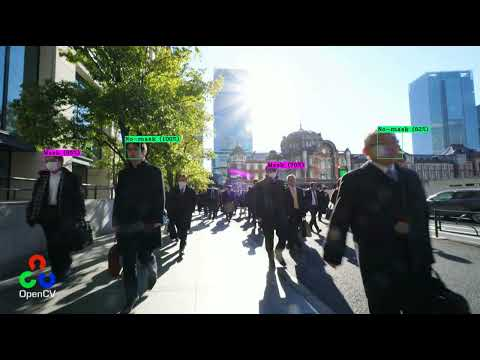

In [23]:
#https://youtu.be/PaO7WMPdcNQ
video = YouTubeVideo("PaO7WMPdcNQ", width=640, height=360)
display(video)